<a href="https://colab.research.google.com/github/opassos/LetsCode/blob/main/Let's_Code_Exerc%C3%ADcio_DataViz_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

In [ ]:
!pip install -Uqqq plotnine

In [ ]:
from plotnine import *
from plotnine.data import *
from plotnine.mapping import after_stat

In [ ]:
df_iris = sns.load_dataset('iris')
df_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


A imagem a seguir nos ajuda a entender os dados na base:

<img src="https://cdn-images-1.medium.com/max/1000/1*gwmXliaxIBkY4NQBhoe9JQ.png" width=600>

## Agora é com você!

Explore a base, **olhe pros dados!**

Em particular, responda às seguintes perguntas (e faça outras, também!)

- Qual é a dimensão do dataset?
- Quais os tipos de dados em cada coluna?
- Há dados vazios na base?
- Quais as estatísticas básicas dos dados no dataset (média, std, etc..)
- Quais e quantos os tipos de flores na base? 
- O dataset é balanceado?
- Existe alguma relação entre o comprimento (length) e a largura (width) da sépala?
- Existe alguma relação entre o comprimento (length) e a largura (width) da pétala?
- Estude agora as relações exploradas acima separadamente entre cada tipo de flor!


### Qual é a dimensão do dataset?

In [ ]:
df_iris.shape

(150, 5)

São 150 linhas (observações) e 5 colunas (features)

### Quais os tipos de dados em cada coluna?

In [ ]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df_iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

Temos 4 colunas com dados contínuos que representam as medidas das flores e uma coluna categórica que representa a espécio das flores

### Há dados vazios na base?

In [ ]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df_iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

Não há nenhum valor faltante na base

### Quais as estatísticas básicas dos dados no dataset?

In [ ]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Quais e quantos os tipos de flores na base?

In [ ]:
df_iris['species'].nunique()

3

In [ ]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

3 espécies
* setosa
* versicolor
* virginica

### Existe alguma relação entre o comprimento (length) e a largura (width) da sépala?

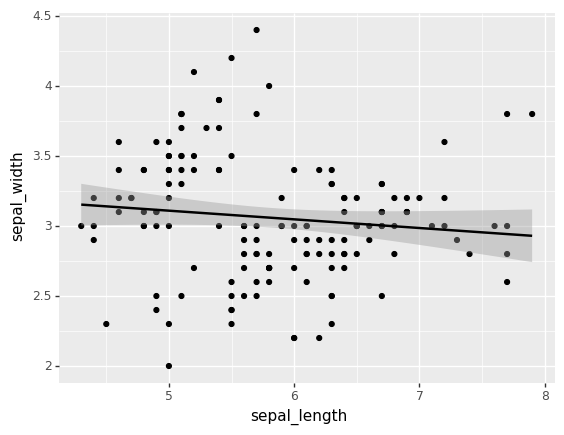

<ggplot: (8777380293681)>

In [ ]:
(ggplot(df_iris, aes(x = 'sepal_length', y = 'sepal_width'))
 + geom_point()
 + geom_smooth(method='lm')
)

Considerando todo o dataset, não há

### Existe alguma relação entre o comprimento (length) e a largura (width) da pétala?

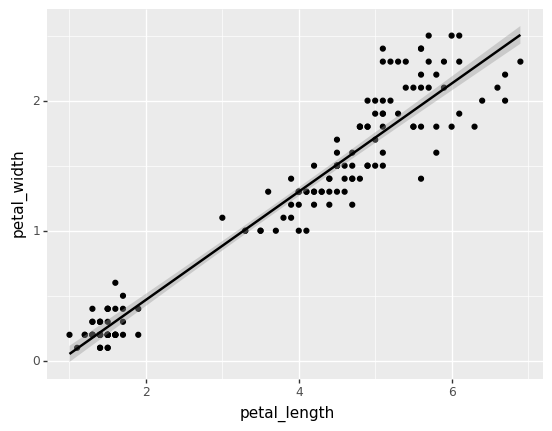

<ggplot: (8777380238057)>

In [ ]:
(ggplot(df_iris, aes(x = 'petal_length', y = 'petal_width'))
 + geom_point()
 + geom_smooth(method='lm')
)


Há uma relação linear clara entre os dados

### Estude agora as relações exploradas acima separadamente entre cada tipo de flor!

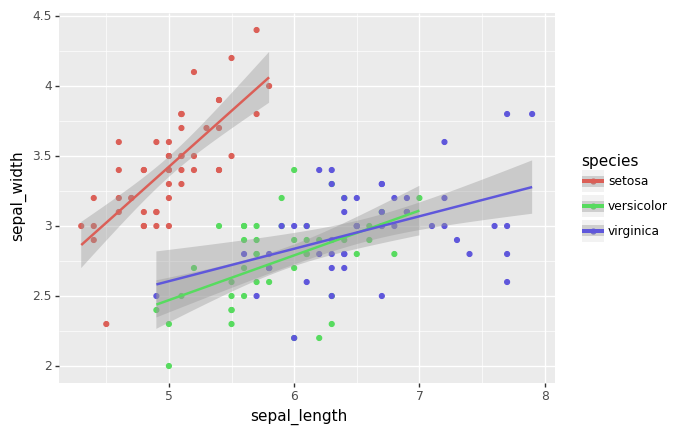

<ggplot: (8777380096461)>

In [ ]:
(ggplot(df_iris, aes(x = 'sepal_length', y = 'sepal_width', color = 'species'))
 + geom_point()
 + geom_smooth(method='lm')
)

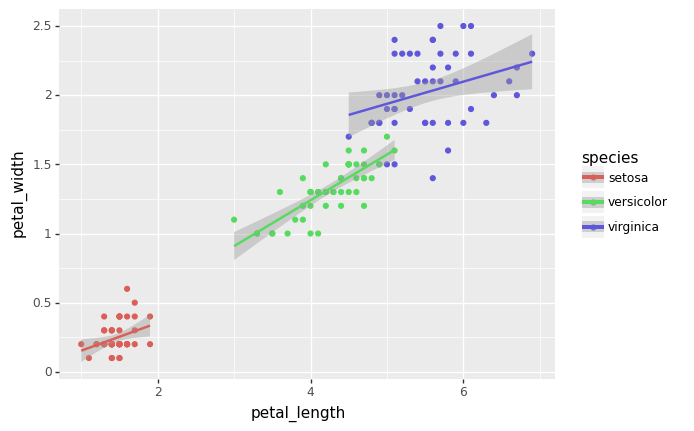

<ggplot: (8777380039373)>

In [ ]:
(ggplot(df_iris, aes(x = 'petal_length', y = 'petal_width', color = 'species'))
 + geom_point()
 + geom_smooth(method='lm')
)

## Bônus

In [ ]:
df_iris2 = df_iris.reset_index().melt(['species', 'index'])
df_iris2[['feature', 'measurement']] = df_iris2['variable'].str.split('_', expand=True)
df_iris2 = df_iris2.drop('variable', axis = 1)
df_iris2

,species,index,value,feature,measurement
0,setosa,0,5.1,sepal,length
1,setosa,1,4.9,sepal,length
2,setosa,2,4.7,sepal,length
3,setosa,3,4.6,sepal,length
4,setosa,4,5.0,sepal,length
...,...,...,...,...,...
595,virginica,145,2.3,petal,width
596,virginica,146,1.9,petal,width
597,virginica,147,2.0,petal,width
598,virginica,148,2.3,petal,width


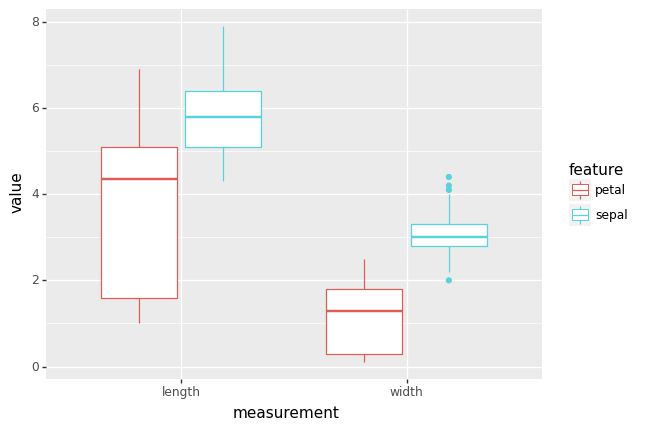

<ggplot: (8777365477909)>

In [ ]:
(ggplot(df_iris2, aes(x = 'measurement', y = 'value', color = 'feature'))
 + geom_boxplot()
)

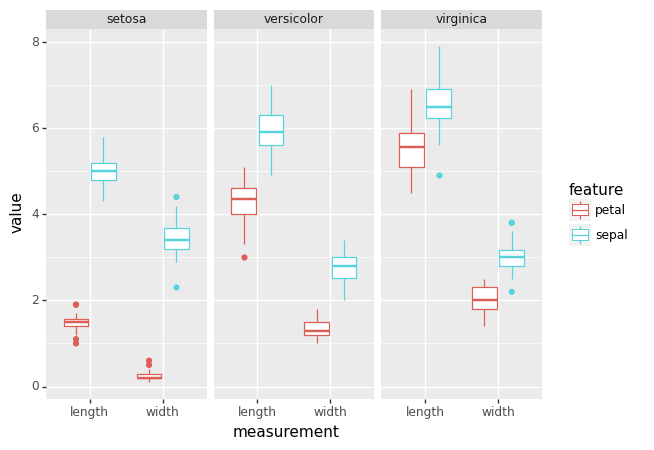

<ggplot: (8777374872997)>

In [ ]:
(ggplot(df_iris2, aes(x = 'measurement', y = 'value', color = 'feature'))
 + geom_boxplot()
 + facet_grid('~ species')
)

In [ ]:
df_iris3 = df_iris2.pivot(['index', 'feature', 'species'], columns = 'measurement', values = 'value').reset_index()
df_iris3

measurement,index,feature,species,length,width
0,0,petal,setosa,1.4,0.2
1,0,sepal,setosa,5.1,3.5
2,1,petal,setosa,1.4,0.2
3,1,sepal,setosa,4.9,3.0
4,2,petal,setosa,1.3,0.2
...,...,...,...,...,...
295,147,sepal,virginica,6.5,3.0
296,148,petal,virginica,5.4,2.3
297,148,sepal,virginica,6.2,3.4
298,149,petal,virginica,5.1,1.8


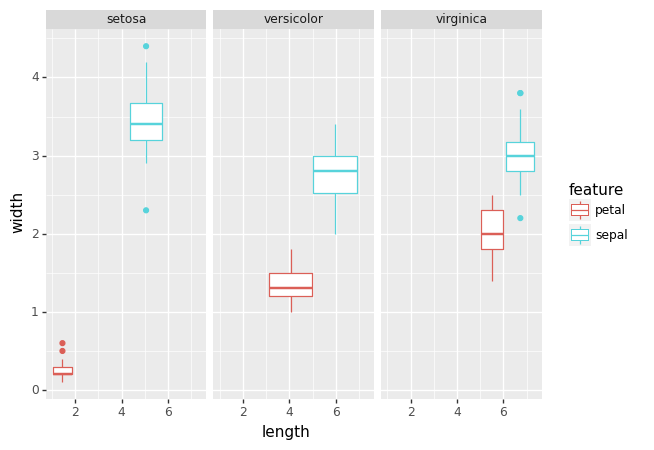

<ggplot: (8777365452653)>

In [ ]:
(ggplot(df_iris3, aes(x = 'length', y = 'width', color = 'feature'))
 + geom_boxplot()
 + facet_grid('~ species')
)